# RandomForestClassifier

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Fetal Health Classification
- Classify the health of a fetus as Normal, Suspect or Pathological using CTG data

In [2]:
# Load Data Set 
file="https://raw.githubusercontent.com/Edubridge-karthik/EXL-CHENNAI---8410-and-PUNE-8414-DA--Batch/main/EXL-CHENNAI%20and%20PUNE-%20DA/Machine%20Learning%20algorithm/fetal_health.xls"
fetal_health=pd.read_csv(file)
fetal_health.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [3]:
fetal_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [5]:
fetal_health.fetal_health.unique()

array([2., 1., 3.])

In [6]:
# Create X and y
# independ Variable and Dependent variables
X=fetal_health.iloc[:,:-1]
X.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0


In [7]:
y=fetal_health.fetal_health
y.head()

0    2.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: fetal_health, dtype: float64

###  Train Test Split the X and y

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_`split(X,y,random_state=123,stratify=y,train_size=.80)


### Model Building using sklearn.ensemble.RandomForestClassifier

In [14]:
from sklearn.ensemble import RandomForestClassifier
RFC_Model=RandomForestClassifier(n_estimators=100,criterion='gini').fit(X_train,y_train)
RFC_Model

RandomForestClassifier()

### Attributes of RandomForestClassifier Model Object

In [19]:
RFC_Model.estimator_

DecisionTreeClassifier()

In [20]:
RFC_Model.base_estimator_

C:\Users\karthick\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute `base_estimator_` was deprecated in version 1.2 and will be removed in 1.4. Use `estimator_` instead.
  warnings.warn(msg, category=FutureWarning)


DecisionTreeClassifier()

In [33]:
RFC_Model.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=788368528),
 DecisionTreeClassifier(max_features='sqrt', random_state=394497395),
 DecisionTreeClassifier(max_features='sqrt', random_state=1351715437),
 DecisionTreeClassifier(max_features='sqrt', random_state=1046308469),
 DecisionTreeClassifier(max_features='sqrt', random_state=1386123461),
 DecisionTreeClassifier(max_features='sqrt', random_state=816203620),
 DecisionTreeClassifier(max_features='sqrt', random_state=467135350),
 DecisionTreeClassifier(max_features='sqrt', random_state=1512484493),
 DecisionTreeClassifier(max_features='sqrt', random_state=773606123),
 DecisionTreeClassifier(max_features='sqrt', random_state=871370916),
 DecisionTreeClassifier(max_features='sqrt', random_state=16581534),
 DecisionTreeClassifier(max_features='sqrt', random_state=952770591),
 DecisionTreeClassifier(max_features='sqrt', random_state=1097502609),
 DecisionTreeClassifier(max_features='sqrt', random_state=1299605882),
 DecisionTreeCl

In [22]:
len(RFC_Model.estimators_)

100

In [23]:
RFC_Model.classes_

array([1., 2., 3.])

In [24]:
RFC_Model.feature_names_in_

array(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations',
       'severe_decelerations', 'prolongued_decelerations',
       'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency'],
      dtype=object)

In [25]:
RFC_Model.feature_importances_

array([0.04169941, 0.05434679, 0.01868901, 0.03920067, 0.00893119,
       0.0006384 , 0.04548725, 0.12123965, 0.1276229 , 0.11262435,
       0.0523603 , 0.03727926, 0.03669511, 0.0289418 , 0.01832167,
       0.00446999, 0.06096474, 0.09182117, 0.05618105, 0.03293068,
       0.0095546 ])

In [26]:
max(RFC_Model.feature_importances_)

0.12762290003048862

### Visualize the RandomForestClassifier Decision Tree

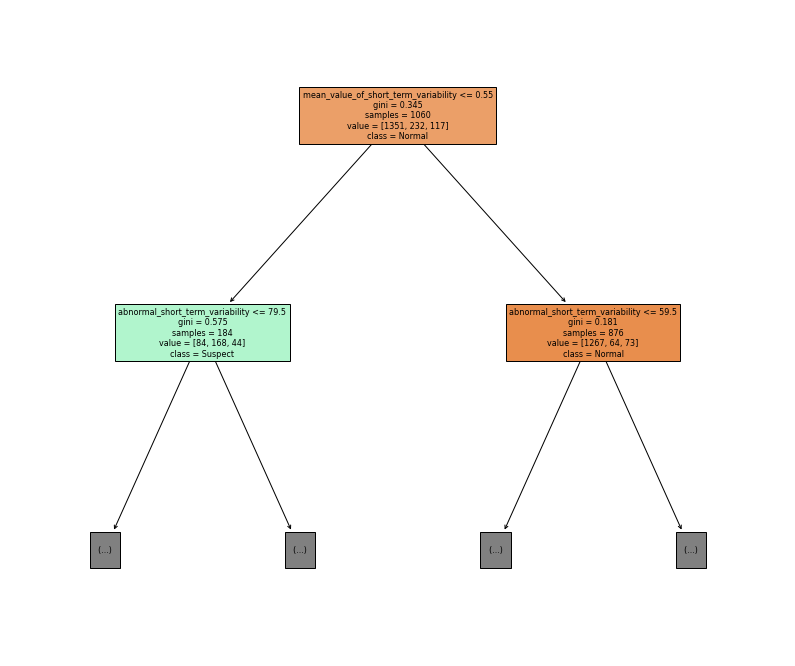

In [37]:
from sklearn.tree import plot_tree
plt.figure(figsize=(14,12))
plot_tree(RFC_Model.estimators_[99],filled=True,max_depth=1,feature_names=RFC_Model.feature_names_in_,class_names=['Normal', 'Suspect','Pathological'])
plt.show()

# Model Performance 

In [38]:
RFC_Model.score(X_test,y_test)

0.9436619718309859

In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9436619718309859

In [ ]:
# y_pred
y_pred=RFC_Model.predict(X_test)
y_pred

In [ ]:
# for Do Select Result.csv 

In [52]:
result=pd.DataFrame({'fetal_health':y_pred})
result.to_csv('result.csv')

In [42]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[326,   4,   2],
       [ 12,  46,   1],
       [  2,   3,  30]], dtype=int64)

<AxesSubplot:>

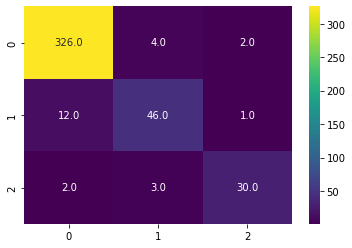

In [47]:
sns.heatmap(cm,annot=True,cmap='viridis',fmt='.1f')

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       332
         2.0       0.87      0.78      0.82        59
         3.0       0.91      0.86      0.88        35

    accuracy                           0.94       426
   macro avg       0.91      0.87      0.89       426
weighted avg       0.94      0.94      0.94       426



# Random Forest Regression 

In [53]:
file2='https://raw.githubusercontent.com/Edubridge-karthik/EXL-CHENNAI---8410-and-PUNE-8414-DA--Batch/main/EXL-CHENNAI%20and%20PUNE-%20DA/Machine%20Learning%20algorithm/ndtv_data_final.xls'
mobile_data=pd.read_csv(file2)
mobile_data.head()

,Unnamed: 0,Name,Brand,Model,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,...,Rear camera,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price
0,0,OnePlus 7T Pro McLaren Edition,OnePlus,7T Pro McLaren Edition,4085,6.67,Yes,1440,3120,8,...,48.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,58998
1,1,Realme X2 Pro,Realme,X2 Pro,4000,6.50,Yes,1080,2400,8,...,64.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,27999
2,2,iPhone 11 Pro Max,Apple,iPhone 11 Pro Max,3969,6.50,Yes,1242,2688,6,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,106900
3,3,iPhone 11,Apple,iPhone 11,3110,6.10,Yes,828,1792,6,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,62900
4,4,LG G8X ThinQ,LG,G8X ThinQ,4000,6.40,Yes,1080,2340,8,...,12.0,32.0,Android,Yes,Yes,Yes,1,No,No,49990


In [54]:
mobile_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1359 non-null   int64  
 1   Name                    1359 non-null   object 
 2   Brand                   1359 non-null   object 
 3   Model                   1359 non-null   object 
 4   Battery capacity (mAh)  1359 non-null   int64  
 5   Screen size (inches)    1359 non-null   float64
 6   Touchscreen             1359 non-null   object 
 7   Resolution x            1359 non-null   int64  
 8   Resolution y            1359 non-null   int64  
 9   Processor               1359 non-null   int64  
 10  RAM (MB)                1359 non-null   int64  
 11  Internal storage (GB)   1359 non-null   float64
 12  Rear camera             1359 non-null   float64
 13  Front camera            1359 non-null   float64
 14  Operating system        1359 non-null   

In [57]:
mobile_data.drop(axis=1,columns=['Unnamed: 0'],inplace=True)

In [60]:
len(mobile_data.Name.unique())


1359

In [61]:
mobile_data.drop(axis=1,columns=['Name'],inplace=True)

In [62]:
len(mobile_data.Brand.unique())

76

In [63]:
mobile_data.drop(axis=1,columns=['Brand'],inplace=True)

In [64]:
len(mobile_data.Model.unique())

1321

In [65]:
mobile_data.drop(axis=1,columns=['Model'],inplace=True)

In [66]:
mobile_data.Touchscreen.unique()

array(['Yes', 'No'], dtype=object)

In [68]:
mobile_data.Touchscreen=mobile_data.Touchscreen.map({'Yes':1, 'No':0})

In [69]:
mobile_data['Operating system'].unique()

array(['Android', 'iOS', 'Cyanogen', 'BlackBerry', 'Windows', 'Tizen',
       'Sailfish'], dtype=object)

In [70]:
mobile_data['Operating system']=mobile_data['Operating system'].map({'Android':1, 'iOS':2, 'Cyanogen':3, 'BlackBerry':4, 'Windows':5, 'Tizen':6,
       'Sailfish':7})

In [72]:
mobile_data['Wi-Fi'].unique()

array(['Yes', 'No'], dtype=object)

In [73]:
mobile_data['Wi-Fi']=mobile_data['Wi-Fi'].map({'Yes':1, 'No':0})

In [74]:
mobile_data.Bluetooth.unique()

array(['Yes', 'No'], dtype=object)

In [75]:
mobile_data.Bluetooth=mobile_data.Bluetooth.map({'Yes':1, 'No':0})

In [77]:
mobile_data.GPS=mobile_data.GPS.map({'Yes':1, 'No':0})

In [78]:
mobile_data['3G'].unique()

array(['Yes', 'No'], dtype=object)

In [79]:
mobile_data['3G']=mobile_data['3G'].map({'Yes':1, 'No':0})

In [80]:
mobile_data['4G/ LTE'].unique()

array(['Yes', 'No'], dtype=object)

In [81]:
mobile_data['4G/ LTE']=mobile_data['4G/ LTE'].map({'Yes':1, 'No':0})

In [82]:
mobile_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Battery capacity (mAh)  1359 non-null   int64  
 1   Screen size (inches)    1359 non-null   float64
 2   Touchscreen             1359 non-null   int64  
 3   Resolution x            1359 non-null   int64  
 4   Resolution y            1359 non-null   int64  
 5   Processor               1359 non-null   int64  
 6   RAM (MB)                1359 non-null   int64  
 7   Internal storage (GB)   1359 non-null   float64
 8   Rear camera             1359 non-null   float64
 9   Front camera            1359 non-null   float64
 10  Operating system        1359 non-null   int64  
 11  Wi-Fi                   1359 non-null   int64  
 12  Bluetooth               1359 non-null   int64  
 13  GPS                     1359 non-null   int64  
 14  Number of SIMs          1359 non-null   

In [84]:
# create X and y
X=mobile_data.iloc[:,:-1]
X.head()

,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,RAM (MB),Internal storage (GB),Rear camera,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE
0,4085,6.67,1,1440,3120,8,12000,256.0,48.0,16.0,1,1,1,1,2,1,1
1,4000,6.50,1,1080,2400,8,6000,64.0,64.0,16.0,1,1,1,1,2,1,1
2,3969,6.50,1,1242,2688,6,4000,64.0,12.0,12.0,2,1,1,1,2,1,1
3,3110,6.10,1,828,1792,6,4000,64.0,12.0,12.0,2,1,1,1,2,1,1
4,4000,6.40,1,1080,2340,8,6000,128.0,12.0,32.0,1,1,1,1,1,0,0


In [85]:
y=mobile_data.Price
y.head()

0     58998
1     27999
2    106900
3     62900
4     49990
Name: Price, dtype: int64

In [86]:
# Train and Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=12)

In [93]:
# build the model
from sklearn.ensemble import RandomForestRegressor
RFR_Model=RandomForestRegressor( n_estimators=100,criterion='squared_error').fit(X_train,y_train)
RFR_Model

RandomForestRegressor()

In [90]:
# model Score
RFR_Model.score(X_test,y_test)

0.5579527986590662

In [91]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression().fit(X_train,y_train)
LR

LinearRegression()

In [92]:
LR.score(X_test,y_test)

0.4847743421409286

# Tree Visualization

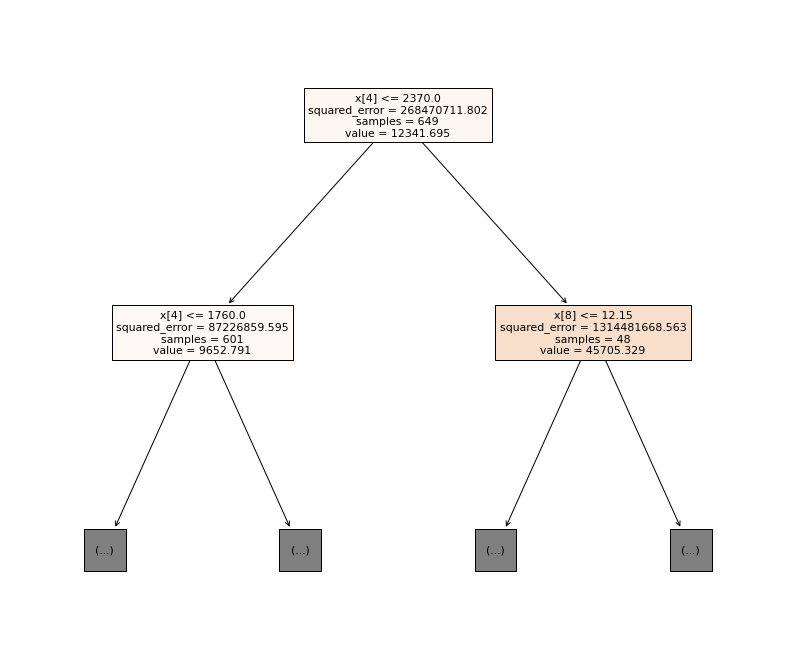

In [96]:
from sklearn.tree import plot_tree
plt.figure(figsize=(14,12))
plot_tree(RFR_Model.estimators_[0],filled=True,max_depth=1) # 0 to 99 trees
plt.show()